# Lab 8

## Task 2

### Construct a decision tree classifier

A decision tree is a flowchart-like tree structure. The topmost node in a decision tree is
known as the root node. It learns to partition on the basis of the attribute value. It partitions
the tree in recursively manner. This flowchart-like structure helps you in decision making. It's
visualization like a flowchart diagram which easily mimics the human level thinking. That is
why decision trees are easy to understand and interpret.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic,
which is not available in the black box type of algorithms such as Neural Network. The
decision tree is a distribution-free or non-parametric method, which does not depend upon
probability distribution assumptions.

1. Download the data file “diabetes_with_head.csv” from GCU-Learn

2. Import the required libraries

In [1]:
import numpy as np
# import pandas
import pandas as pd
# import seaborn 
import seaborn as sns
# import mat plot lib
import matplotlib.pyplot as plt
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

3. Import the diabetes_with_head dataset and check the features

In [2]:
df2 = pd.read_csv("../lab8/diabetes_with_head.csv")
print(df2.shape)
df2.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4. Similar to week 7 lab, exploring and pre-processing the diabetes data

In [3]:
# check the type of data
print(df2.dtypes)

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
BMI         float64
pedigree    float64
age           int64
label         int64
dtype: object


In [4]:
# check duplicate rows
duplicate_rows = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 9)


There are no duplicated rows, so no further process needed

In [5]:
# print summary statictics
print(df2.describe())

         pregnant     glucose          bp        skin     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [6]:
# dispaly the first 10 rows
print(df2.head(10))

   pregnant  glucose  bp  skin  insulin   BMI  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
5         5      116  74     0        0  25.6     0.201   30      0
6         3       78  50    32       88  31.0     0.248   26      1
7        10      115   0     0        0  35.3     0.134   29      0
8         2      197  70    45      543  30.5     0.158   53      1
9         8      125  96     0        0   0.0     0.232   54      1


In [7]:
# Count the number of null values in each column
print(df2.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
BMI         0
pedigree    0
age         0
label       0
dtype: int64


As mentioned in week 7 lab, on some columns, a value of zero does not make sense
and indicates an invalid or missing value. So we should treat zero values in those
columns (i.e., "glucose","bp","skin","insulin","BMI" in this diabetes data) as invalid/
missing values. 

In [8]:
# count of the number of missing values on each of these columns
print((df2[["glucose","bp","skin","insulin","BMI"]] == 0).sum())

# mark zero values as missing (with the value of NaN)
df2[["glucose","bp","skin","insulin","BMI"]] = df2[["glucose","bp","skin","insulin","BMI"]].replace(0, np.NaN)
# check the number of NaN values in each column
print(df2.isnull().sum())
# print the first 10 rows of data
print(df2.head(10))

# fill missing values with mean column values
df2.fillna(df2.mean(), inplace=True)
# check if there is still any NaN values in the dataset
print(df2.isnull().sum())
# check the imputated the first 10 rows of data
print(df2.head(10))

glucose      5
bp          35
skin       227
insulin    374
BMI         11
dtype: int64
pregnant      0
glucose       5
bp           35
skin        227
insulin     374
BMI          11
pedigree      0
age           0
label         0
dtype: int64
   pregnant  glucose    bp  skin  insulin   BMI  pedigree  age  label
0         6    148.0  72.0  35.0      NaN  33.6     0.627   50      1
1         1     85.0  66.0  29.0      NaN  26.6     0.351   31      0
2         8    183.0  64.0   NaN      NaN  23.3     0.672   32      1
3         1     89.0  66.0  23.0     94.0  28.1     0.167   21      0
4         0    137.0  40.0  35.0    168.0  43.1     2.288   33      1
5         5    116.0  74.0   NaN      NaN  25.6     0.201   30      0
6         3     78.0  50.0  32.0     88.0  31.0     0.248   26      1
7        10    115.0   NaN   NaN      NaN  35.3     0.134   29      0
8         2    197.0  70.0  45.0    543.0  30.5     0.158   53      1
9         8    125.0  96.0   NaN      NaN   NaN     0.2

          pregnant   glucose        bp      skin   insulin       BMI  \
pregnant  1.000000  0.127911  0.208522  0.082989  0.056027  0.021565   
glucose   0.127911  1.000000  0.218367  0.192991  0.420157  0.230941   
bp        0.208522  0.218367  1.000000  0.192816  0.072517  0.281268   
skin      0.082989  0.192991  0.192816  1.000000  0.158139  0.542398   
insulin   0.056027  0.420157  0.072517  0.158139  1.000000  0.166586   
BMI       0.021565  0.230941  0.281268  0.542398  0.166586  1.000000   
pedigree -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400   
age       0.544341  0.266534  0.324595  0.127872  0.136734  0.025519   
label     0.221898  0.492928  0.166074  0.215299  0.214411  0.311924   

          pedigree       age     label  
pregnant -0.033523  0.544341  0.221898  
glucose   0.137060  0.266534  0.492928  
bp       -0.002763  0.324595  0.166074  
skin      0.100966  0.127872  0.215299  
insulin   0.098634  0.136734  0.214411  
BMI       0.153400  0.025519  0.3

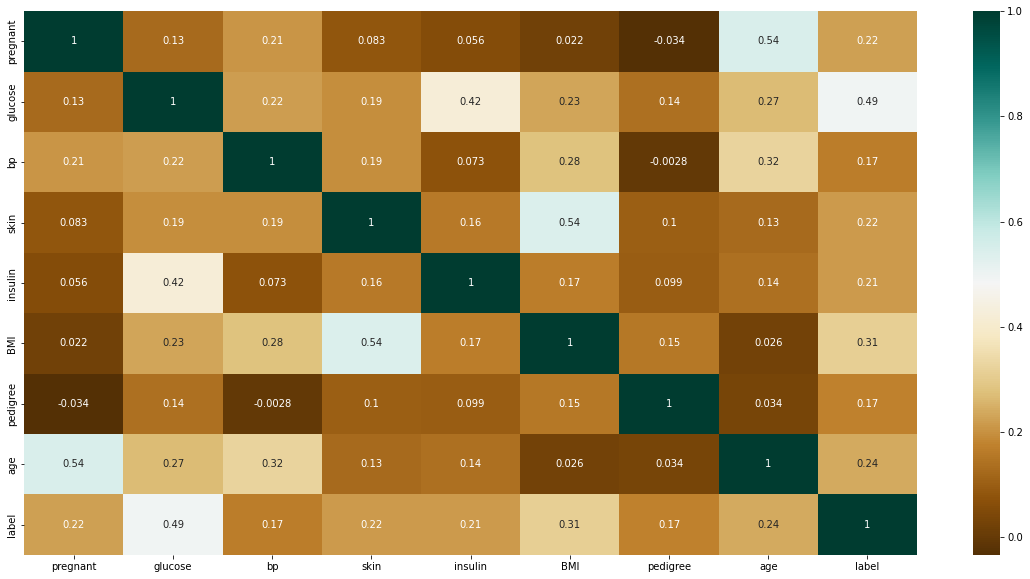

In [9]:
# Finding the correlations between the variables.
plt.figure(figsize=(20,10))
corl= df2.corr()
sns.heatmap(corl,cmap="BrBG",annot=True)
print(corl)

The maximum correlation coefficient in this matrix is 0.54, which means variables in
this data are not significantly correlated, so no further processes

5. Specify the input variables and the target variable.
We will use the first eight columns as input variable and the last column, i.e., label, as
target variable to build a Decision Tree.

In [10]:
#split dataset into input variable X and target variable y
X = df2.drop(['label'], axis=1)

#check that the class variable has been removed
X.head()

,pregnant,glucose,bp,skin,insulin,BMI,pedigree,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [11]:
#separate target variable
y = df2.label

#view target values
print(y[0:5])

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


6. Split the dataset into two pieces: 70% as training set and 30% as testing set. 

In [12]:
# Split dataset into training set and test set:  70% training and 30% testing
X_train, X_Vali_test, y_train, y_Vali_test = train_test_split(X, y, test_size=0.3, random_state=1) 

print(X_train.shape)

(537, 8)


7. Construct the Decision Tree. Use the ‘fit’ function and pass in our training data as
parameters to train the Decision Tree classifier.

In [13]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

8. Testing the accuracy of the model
Once the model is trained, we can use the ‘predict’ function on our model to make
predictions on our test data and calculate the accuracy score.

In [14]:
#Predict the response for test dataset
y_pred = clf.predict(X_Vali_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Vali_test, y_pred))

Accuracy: 0.7489177489177489


Which means, our Decision Tree classifier has an accuracy of approximately
74.89%.

9. Visualising the Decision Tree

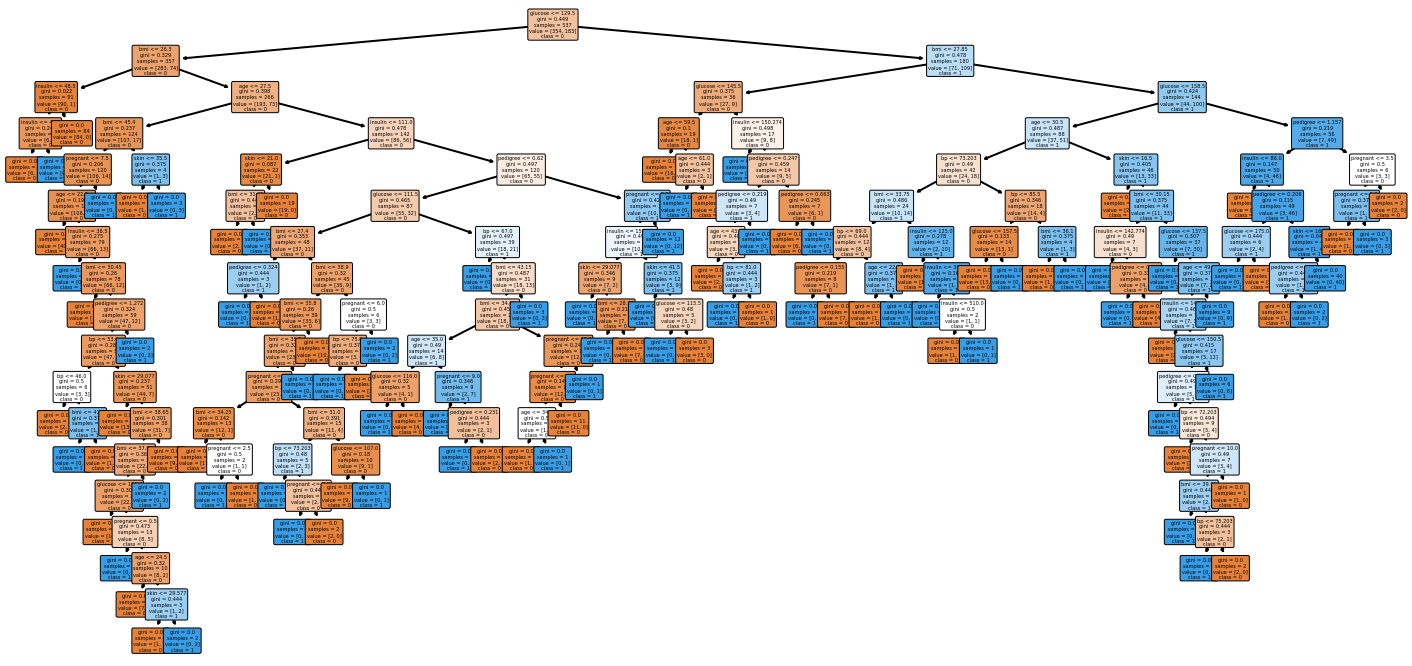

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_cols = ['pregnant', 'glucose','bp','skin','insulin', 'bmi','pedigree', 'age']

plt.figure(figsize=(25,12))
a = plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True, fontsize = 5)

for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

10. Tune the decision tree model
Let us limit the max-depth of the Decision Tree as ‘3’ and use “entropy” as the
criterion to measure the quality of a split.

In [16]:
# Create Decision Tree classifier object
clf_02 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_02 = clf_02.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_02.predict(X_Vali_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Vali_test, y_pred))

Accuracy: 0.7662337662337663


This demonstrated that the updated Decision Tree classifier has better accuracy of
approximately 76.62%.

11. Visualized the tuned decision tree

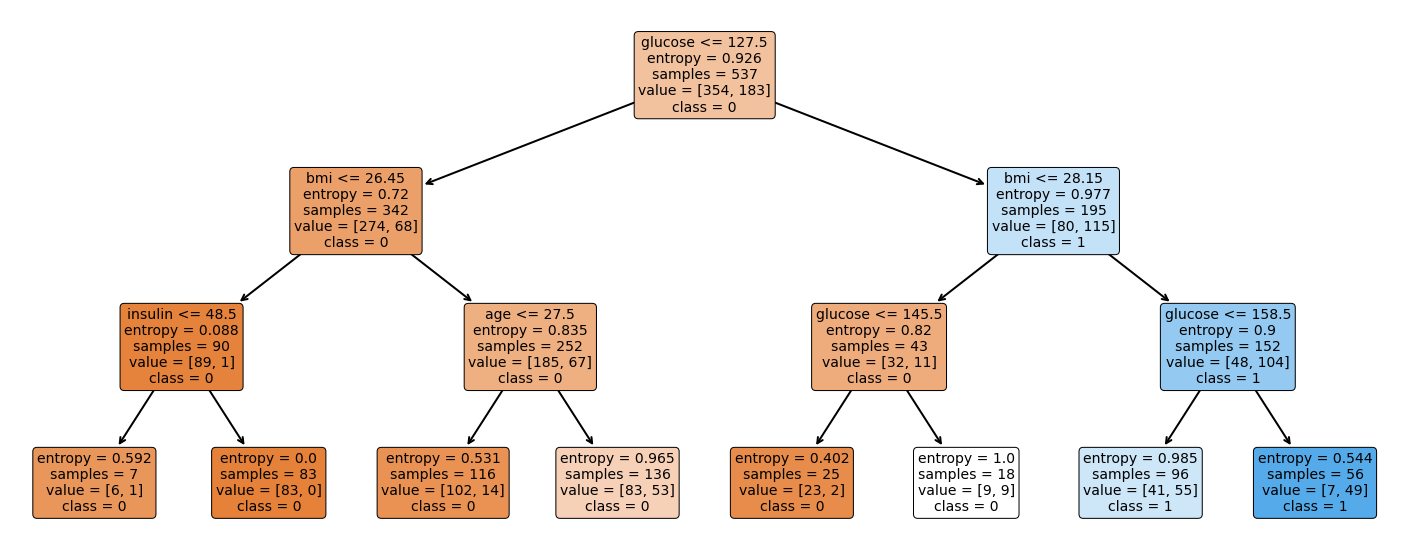

In [17]:
plt.figure(figsize=(25,10))
a = plot_tree(clf_02, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True, fontsize = 14)
for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)